In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('../data/dataset_clean.csv')

# dow one hot
enc = OneHotEncoder()
df[[f"order_dow_{x}" for x in range(7)]] = enc.fit_transform(df.loc[:, 'order_dow'].values.reshape((-1, 1))).toarray()

# hod one hot
enc = OneHotEncoder()
df[[f"order_hod_{x}" for x in range(24)]] = enc.fit_transform(df.loc[:, 'order_hour_of_day'].values.reshape((-1, 1))).toarray()
df.head()

,order_id,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,category_10,category_11,category_12,category_13,category_14,category_15,category_16,category_17,category_18,category_19,category_20,category_21,category_1_count,category_2_count,category_3_count,category_4_count,category_5_count,category_6_count,category_7_count,category_8_count,category_9_count,category_10_count,category_11_count,category_12_count,category_13_count,category_14_count,category_15_count,category_16_count,category_17_count,category_18_count,category_19_count,category_20_count,category_21_count,order_dow,order_hour_of_day,order_dow_0,order_dow_1,order_dow_2,order_dow_3,order_dow_4,order_dow_5,order_dow_6,order_hod_0,order_hod_1,order_hod_2,order_hod_3,order_hod_4,order_hod_5,order_hod_6,order_hod_7,order_hod_8,order_hod_9,order_hod_10,order_hod_11,order_hod_12,order_hod_13,order_hod_14,order_hod_15,order_hod_16,order_hod_17,order_hod_18,order_hod_19,order_hod_20,order_hod_21,order_hod_22,order_hod_23
0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,4,10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5,17,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,2.0,0.0,0.0,3.0,3.0,0.0,4.0,1.0,0.0,6,16,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

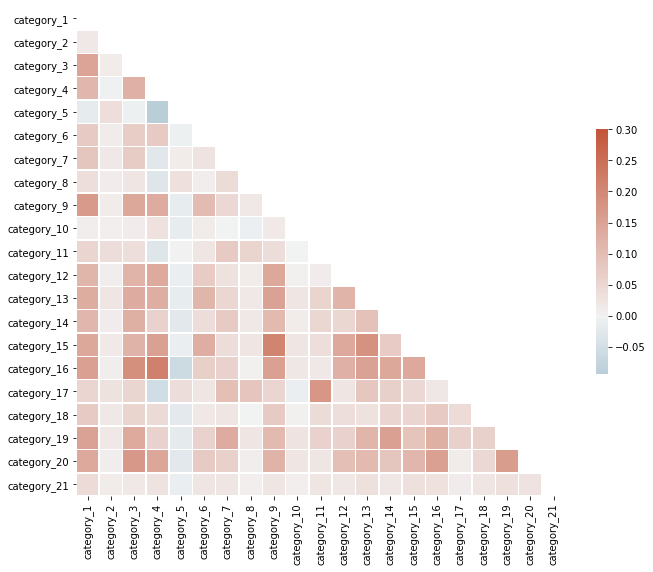

In [3]:
#correlation of indicator variables
corr = df[[f"category_{i}" for i in range(1, 22)]].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

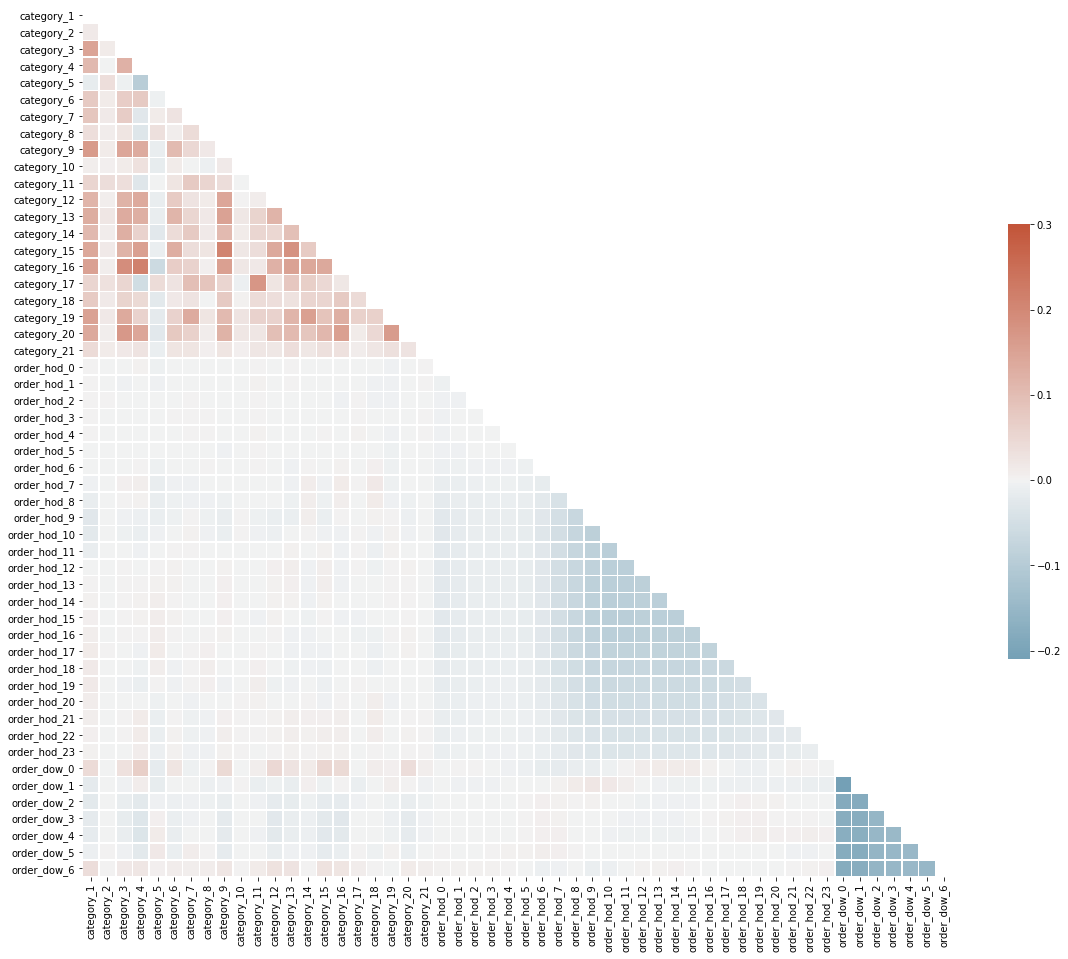

In [6]:
#correlation of indicator variables
corr = df[[f"category_{i}" for i in range(1, 22)] 
          + [f"order_hod_{i}" for i in range(24)]
          + [f"order_dow_{i}" for i in range(7)]
         ].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# prior probabilities
df[[f"category_{i}" for i in range(1, 22)]].mean(axis=0)

Text(0.5, 1.0, 'sum of products in corresponding product category ordered')

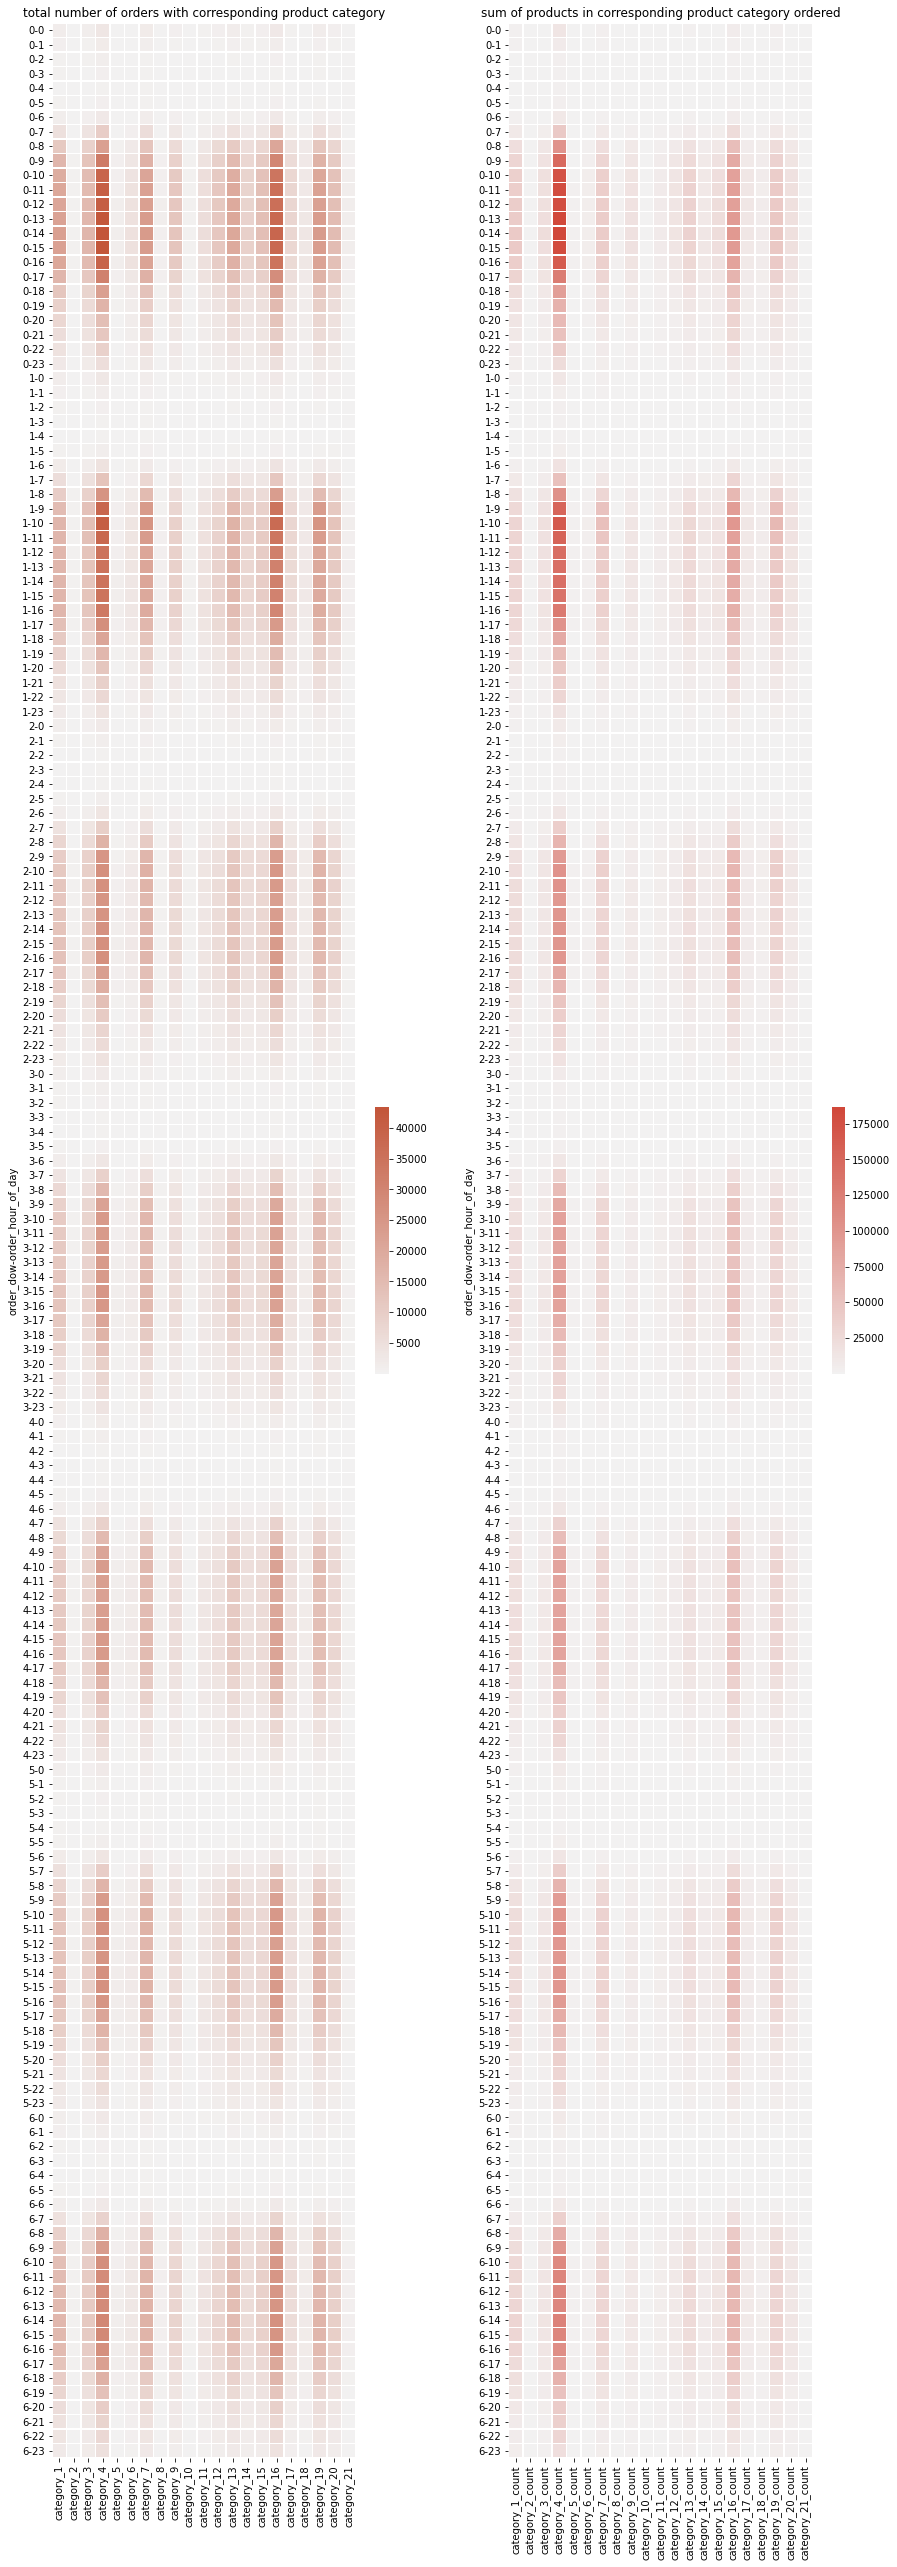

In [31]:
# grouping of indicator variables based on dow and hod
count = df.groupby(['order_dow', 'order_hour_of_day'])[[f"category_{i}" for i in range(1, 22)]].sum()
# Set up the matplotlib figure
f, ax = plt.subplots(1, 2, figsize=(15, 70))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
vmax = count.max().max()
vmin = count.min().min()
sns.heatmap(count, cmap=cmap, vmax=vmax, vmin=vmin, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .07}, ax=ax[0])

# grouping of counts based on dow and hod
count = df.groupby(['order_dow', 'order_hour_of_day'])[[f"category_{i}_count" for i in range(1, 22)]].sum()
# Draw the heatmap with the mask and correct aspect ratio
vmax = count.max().max()
vmin = count.min().min()
sns.heatmap(count, cmap=cmap, vmax=vmax, vmin=vmin, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .07}, ax=ax[1])

ax[0].set_title('total number of orders with corresponding product category')
ax[1].set_title('sum of products in corresponding product category ordered')

In [32]:
# most commonly purchased product categories based on presence
df[[f"category_{i}" for i in range(1, 22)]].sum(axis=0).sort_values(ascending=False)[:5]

category_4     2506247.0
category_16    2264738.0
category_7     1518833.0
category_19    1448749.0
category_1     1232089.0
dtype: float64

In [33]:
# most commonly purchased product categories based on count
df[[f"category_{i}_count" for i in range(1, 22)]].sum(axis=0).sort_values(ascending=False)[:5]

category_4_count     9888378.0
category_16_count    5631067.0
category_19_count    3006412.0
category_7_count     2804175.0
category_1_count     2336858.0
dtype: float64

<AxesSubplot:>

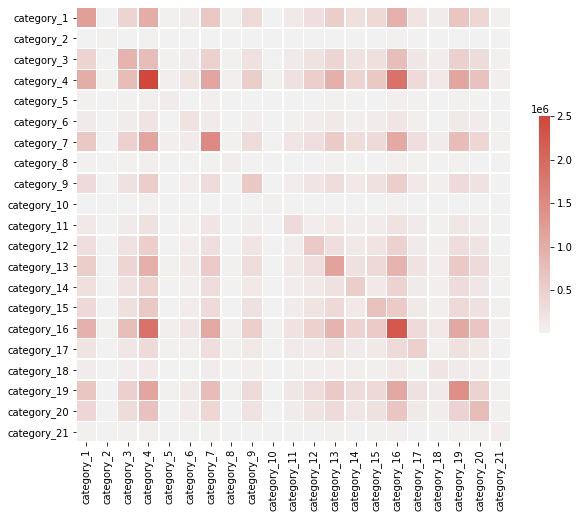

In [40]:
# cooccurrence
arr = df[[f"category_{i}" for i in range(1, 22)]].values.astype(int)
cooc = arr.T.dot(arr)
cooc = pd.DataFrame(cooc, 
                    columns=[f"category_{i}" for i in range(1, 22)], 
                    index=[f"category_{i}" for i in range(1, 22)])

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

vmax = cooc.max().max()
vmin = cooc.min().min()
sns.heatmap(cooc, cmap=cmap, vmax=vmax, vmin=vmin, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5})

In [41]:
# prevalence
df[[f"category_{i}" for i in range(1, 22)]].mean(axis=0)

category_1     0.368218
category_2     0.010992
category_3     0.274345
category_4     0.749009
category_5     0.026238
category_6     0.069112
category_7     0.453914
category_8     0.018532
category_9     0.186408
category_10    0.010497
category_11    0.099658
category_12    0.179020
category_13    0.348315
category_14    0.163495
category_15    0.212404
category_16    0.676833
category_17    0.147165
category_18    0.055012
category_19    0.432969
category_20    0.239857
category_21    0.019847
dtype: float64